# Data preparation

Please clone [this repo](https://github.com/emerald-geomodelling/simpeg-simpleem-examples) next to this one and run the notebook
[demo_data_download.ipynb](https://github.com/emerald-geomodelling/simpeg-simpleem-examples/blob/master/measured_inversion.ipynb)
before this notebook to download the demo data to data/IncisedValley.

In [1]:
import libaarhusxyz
import beryl_pipeline.file_import
import beryl_pipeline.processing
import beryl_pipeline.inversion
import luigi.contrib.opener
import poltergust_luigi_utils.caching
import yaml
import shutil
import os.path

Loading S3 module without the python package boto3. Will crash at runtime if S3 functionality is used.


Cannot import Pardiso, will use SolverLU


In [2]:
rootpath = os.path.abspath("./data")
cachepath = os.path.expanduser("~/.cache/poltergust-luigi-utils")
srcpath = os.path.abspath("../../simpeg-simpleem-examples/data/IncisedValley")

src = "file://" + srcpath
root = "file://" + rootpath

In [3]:
if os.path.exists(rootpath):
    shutil.rmtree(rootpath)
if os.path.exists(cachepath):
    shutil.rmtree(cachepath)

In [4]:
with poltergust_luigi_utils.caching.CachingOpenerTarget(root + "/import/config.yml").open("w") as f:
    yaml.dump({
        "importer": {
            "name": "SkyTEM XYZ",
            "args": {
                "projection": 25832,
                "files": {
                    "xyzfile": src + "/aem_processed_data_foothill_central_valley.100101.0.xyz",
                    "gexfile": src + "/20201231_20023_IVF_SkyTEM304_SKB.gex"
                }
            }
        }
    }, f)

In [5]:
import_task = beryl_pipeline.file_import.Import(import_name = root + "/import")

luigi.build([import_task], local_scheduler=True)

DEBUG: Checking if Import(import_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/import) is complete
INFO: Informed scheduler that task   Import_file____home_red_d5a4321800   has status   PENDING
INFO: Done scheduling tasks
INFO: Running Worker with 1 processes
DEBUG: Asking scheduler for work...
DEBUG: Pending tasks: 1
INFO: [pid 1747282] Worker Worker(salt=5015969789, workers=1, host=glittertind, username=redhog, pid=1747282) running   Import(import_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/import)


header [General] parsed
header [Channel1] parsed
header [Channel2] parsed


INFO: [pid 1747282] Worker Worker(salt=5015969789, workers=1, host=glittertind, username=redhog, pid=1747282) done      Import(import_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/import)
DEBUG: 1 running tasks, waiting for next task to finish
INFO: Informed scheduler that task   Import_file____home_red_d5a4321800   has status   DONE
DEBUG: Asking scheduler for work...
DEBUG: Done
DEBUG: There are no more tasks to run at this time
INFO: Worker Worker(salt=5015969789, workers=1, host=glittertind, username=redhog, pid=1747282) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 ran successfully:
    - 1 Import(import_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/import)

This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



True

INFO: Worker Worker(salt=3294394656, workers=1, host=glittertind, username=redhog, pid=1747282) was stopped. Shutting down Keep-Alive thread


In [6]:
os.listdir(rootpath + "/import")

['out.msgpack',
 'config.yml',
 'out.gex',
 'out.summary.yml',
 'out.100101_0.msgpack',
 'DONE',
 'out.100101_0.gex',
 'out.100101_0.geojson',
 'out.100101_0.summary.yml',
 'log.yml',
 'out.xyz',
 'out.100101_0.xyz',
 'out.geojson']

In [7]:
with poltergust_luigi_utils.caching.CachingOpenerTarget(root + "/processing/config.yml").open("w") as f:
     f.write(f"""
data:
  args:
    data: {root}/import/out.xyz
    sidecar: null
    system_data: {root}/import/out.gex
  name: emeraldprocessing.pipeline.ProcessingData
steps:
- 'Classify high altitude flightlines: Auto':
    height_threshold: 500
    verbose: true
#- 'Classify flightlines: Selection':
#    flight_type: g1
#    lines: [500101, 500102, 500201, 500202, 500301, 500302, 500401, 500402, 500403, 500501, 500502, 500601, 500602, 500603, 500604, 500605, 500606, 500701, 500702, 500703, 500801, 500802, 500803, 500804, 500805, 500901, 500902, 500903, 501001, 501002, 501101, 501102, 501103, 501104, 501105, 501106, 501201, 501202, 501203, 501204, 501301, 501302, 501303, 501304, 501305, 501401, 501402, 501403, 501501, 501502, 501503, 501601, 501602, 501603, 501604, 501605, 501606, 501701, 501702, 501703, 501704, 501705, 501706, 501707, 501801, 501802, 501803, 501804, 501805, 501806, 501807, 501901, 501902, 501903, 501904, 501905, 501906, 501907, 501908, 502001, 502002, 502003, 502004, 502005, 502006, 502007, 502008, 502009, 502101, 502102, 502103, 502104, 502201, 502202, 502203, 502301, 502302, 502303, 502401, 502402, 502403, 502501, 502502, 502601, 502602, 502701, 502702]
#- 'Classify flightlines: Selection':
#    flight_type: g2
#    lines: [600101, 600102, 600103, 600201, 600202, 600203, 600301, 600401, 600402, 600501, 600502, 600503, 600504, 600601, 600602, 600603, 600604, 600605, 600606, 600701, 600702, 600801, 600901, 601001, 601002, 601101, 601201, 601301, 601401, 601501, 601502, 601601, 601701, 601702, 601703, 601704, 601801, 601901, 602001, 602101, 602201, 602301]
#- 'Classify flightlines: Selection':
#    flight_type: Production
#    lines:
#    - 300201
#- 'Classify flightlines: Selection':
#    flight_type: Test
#    lines:
#    - 300101
#- Replace STD error from GEX:
#    channel: 1
#- Replace STD error from GEX:
#    channel: 2
#- Add STD error:
#    channel_and_gates:
#      channel: 1
#      end_gate: 0
#      start_gate: 15
#    error_fraction: 0.01
#- Add STD error:
#    channel_and_gates:
#      channel: 2
#      end_gate: 0
#      start_gate: 20
#    error_fraction: 0.01
#- Add STD error:
#    channel_and_gates:
#      channel: 1
#      end_gate: 0
#      start_gate: 20
#    error_fraction: 0.01
#- Add STD error:
#    channel_and_gates:
#      channel: 2
#      end_gate: 0
#      start_gate: 25
#    error_fraction: 0.01
#- Correct altitude and topo:
#    terrain_model: /path/to/shapefile
#    verbose: false
- Disable soundings by tilt and altitude:
    max_alt: 110
    max_pitch: 10
    max_roll: 10
    verbose: false
- Correct data and tilt for 1D:
    verbose: false
- Enable/Disable gates by index:
    action: disable
    channel_and_gate:
      channel: 1
      gate: 0
- Enable/Disable gates by index:
    action: disable
    channel_and_gate:
      channel: 2
      gate: 0
- Disable gates by STD values:
    channel_and_gate:
      channel: 1
      gate: 7
    disable_earlier_gates: 0
    disable_sounding_tails: true
    std_threshold: 0.15
- Disable gates by STD values:
    channel_and_gate:
      channel: 2
      gate: 13
    disable_earlier_gates: 0
    disable_sounding_tails: true
    std_threshold: 0.15
- Disable gates by negative data:
    channel_and_gate:
      channel: 1
      gate: 7
    disable_earlier_gates: 0
    disable_sounding_tails: true
    save_filter_to_layer_data: true
- Disable gates by negative data:
    channel_and_gate:
      channel: 2
      gate: 13
    disable_earlier_gates: 0
    disable_sounding_tails: true
- Disable gates by slope max:
    channel_and_gate:
      channel: 1
      gate: 7
    disable_earlier_gates: 0
    disable_sounding_tails: true
    max_slope: 0
    verbose: true
- Disable gates by slope max:
    channel_and_gate:
      channel: 2
      gate: 13
    disable_earlier_gates: 0
    disable_sounding_tails: true
    max_slope: 0
    verbose: true
- Disable gates by slope min:
    channel_and_gate:
      channel: 1
      gate: 7
    disable_earlier_gates: 0
    disable_sounding_tails: true
    min_slope: -6.0
    verbose: true
- Disable gates by slope min:
    channel_and_gate:
      channel: 2
      gate: 13
    disable_earlier_gates: 0
    disable_sounding_tails: true
    min_slope: -6.0
    verbose: true
- Disable soundings by number of active gates:
    channel: 1
    min_number_of_gates: 4
- Disable soundings by number of active gates:
    channel: 2
    min_number_of_gates: 4
""")


In [8]:
processing_task = beryl_pipeline.processing.Processing(processing_name = root + "/processing")

luigi.build([processing_task], local_scheduler=True)


DEBUG: Checking if Processing(processing_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/processing) is complete
DEBUG: Checking if Import(import_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/import) is complete
INFO: Informed scheduler that task   Processing_file____home_red_b8427b8c31   has status   PENDING
INFO: Informed scheduler that task   Import_file____home_red_d5a4321800   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 1 processes
DEBUG: Asking scheduler for work...
DEBUG: Pending tasks: 1
INFO: [pid 1747282] Worker Worker(salt=3294394656, workers=1, host=glittertind, username=redhog, pid=1747282) running   Processing(processing_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/processing)


=============== Reading SkyTEM xyz data ===============
  - Reading gex file.
header [General] parsed
header [Channel1] parsed
header [Channel2] parsed
  - Reading xyz file.
  - building xyz dictionary
  - Done reading the data package!
  - Time used to read and import the data package: 0.16052627563476562 sec.


=============== Processing step 1 ===============
  - Step name: 'Classify high altitude flightlines: Auto'
  - Classifying flightlines with mean altitude ≥ 500 as 'High-altitude'
  - No lines have been found as high altitude.
    - All lines without a previous flight_type classification have been labeled 'Production'.
  - Flight types in dataset: ['Production']
  - Time used to auto-classify the dataset: 0.004280567169189453 sec.


=============== Processing step 2 ===============
  - Step name: 'Disable soundings by tilt and altitude'
  - Disabling based on roll (±10°), pitch(±10°), and altitude (110 m) limits
  - Pre-disable statistics:
    - TxRoll:     0.0 ± 0.0 °
    - T

INFO: [pid 1747282] Worker Worker(salt=3294394656, workers=1, host=glittertind, username=redhog, pid=1747282) done      Processing(processing_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/processing)
DEBUG: 1 running tasks, waiting for next task to finish
INFO: Informed scheduler that task   Processing_file____home_red_b8427b8c31   has status   DONE
DEBUG: Asking scheduler for work...
DEBUG: Done
DEBUG: There are no more tasks to run at this time
INFO: 
===== Luigi Execution Summary =====

Scheduled 2 tasks of which:
* 1 complete ones were encountered:
    - 1 Import(import_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/import)
* 1 ran successfully:
    - 1 Processing(processing_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/processing)

This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



True

INFO: Worker Worker(salt=3815126022, workers=1, host=glittertind, username=redhog, pid=1747282) was stopped. Shutting down Keep-Alive thread


In [9]:
os.listdir(rootpath + "/processing")


['processed.100101_0.gex',
 'processed.100101_0.diff.msgpack',
 'config.yml',
 'processed.100101_0.msgpack',
 'processed.diff.msgpack',
 'processed.100101_0.xyz',
 'processed.xyz',
 'processed.100101_0.geojson',
 'processed.gex',
 'DONE',
 'processed.100101_0.summary.yml',
 'processed.msgpack',
 'log.yml',
 'processed.geojson',
 'processed.summary.yml']

In [10]:
with luigi.contrib.opener.OpenerTarget(root + "/inversion/config.yml").open("w") as f:
    yaml.dump({
            "system": {
                "name": "Dual moment TEM",
                "args": {
                    "directives__irls": True,
                    "optimizer__max_iter": 4, # Change this to 40 to actually make a good model
                    "optimizer__max_iter_cg": 2 # Change this to 20 to actually make a good model
                },
            },
            "data": root + "/processing/processed.xyz",
            "system_data": root + "/processing/processed.gex",
    }, f)

In [11]:
inversion_task = beryl_pipeline.inversion.Inversion(inversion_name = root + "/inversion")

luigi.build([inversion_task], local_scheduler=True)

DEBUG: Checking if Inversion(inversion_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/inversion) is complete
DEBUG: Checking if Processing(processing_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/processing) is complete
INFO: Informed scheduler that task   Inversion_file____home_red_632d4efc73   has status   PENDING
INFO: Informed scheduler that task   Processing_file____home_red_b8427b8c31   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 1 processes
DEBUG: Asking scheduler for work...
DEBUG: Pending tasks: 1
INFO: [pid 1747282] Worker Worker(salt=3815126022, workers=1, host=glittertind, username=redhog, pid=1747282) running   Inversion(inversion_name=file:///home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/inversion)


No MKL support:  cannot access local variable 'MKLlib' where it is not associated with a value
Could not import PardisoSolver, only default (spLU) available
header [General] parsed
header [Channel1] parsed
header [Channel2] parsed
Monitoring already in progress.
Using default (spLU) solver
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.07e+02  7.04e+06  0.00e+00  7.04e+06    2.94e+05      0              

                Default solver: SolverDiag is being used in bfgsH0
                


/home/redhog/Projects/Emerald/emerald-beryl-pipeline/env/lib/python3.11/site-packages/SimPEG/utils/solver_utils.py:147: UserWarning: tol is not a valid keyword for cg and will be ignored
  warnings.warn(


   1  5.33e+01  1.40e+06  1.08e+03  1.45e+06    5.37e+04      0              
   2  2.66e+01  5.62e+05  5.51e+03  7.08e+05    4.46e+04      0   Skip BFGS  
   3  1.33e+01  4.75e+05  2.11e+03  5.03e+05    1.77e+04      0              
   4  6.66e+00  2.68e+05  1.01e+04  3.35e+05    1.50e+04      0   Skip BFGS  
------------------------- STOP! -------------------------
1 : |fc-fOld| = 1.6832e+05 <= tolF*(1+|f0|) = 7.0351e+05
1 : |xc-x_last| = 2.1995e+01 <= tolX*(1+|x0|) = 3.5142e+01
0 : |proj(x-g)-x|    = 1.5045e+04 <= tolG          = 1.0000e-01
0 : |proj(x-g)-x|    = 1.5045e+04 <= 1e3*eps       = 1.0000e-02
1 : maxIter   =       4    <= iter          =      4
------------------------- DONE! -------------------------


/home/redhog/Projects/Emerald/emerald-beryl-pipeline/env/lib/python3.11/site-packages/SimPEG/electromagnetics/utils/static_instrument/base.py:510: RuntimeWarning: divide by zero encountered in divide
  std = np.abs(1 / self.inv.invProb.dmisfit.W.diagonal() / self.inv.invProb.dmisfit.data.dobs)
/home/redhog/Projects/Emerald/emerald-beryl-pipeline/env/lib/python3.11/site-packages/SimPEG/electromagnetics/utils/static_instrument/base.py:510: RuntimeWarning: divide by zero encountered in divide
  std = np.abs(1 / self.inv.invProb.dmisfit.W.diagonal() / self.inv.invProb.dmisfit.data.dobs)
/home/redhog/Projects/Emerald/emerald-beryl-pipeline/env/lib/python3.11/site-packages/SimPEG/electromagnetics/utils/static_instrument/base.py:526: RuntimeWarning: invalid value encountered in divide
  xyzresp.flightlines['resdata'] = np.sqrt(np.nansum(derrall**2, axis=1) / (derrall > 0).sum(axis=1))
INFO: [pid 1747282] Worker Worker(salt=3815126022, workers=1, host=glittertind, username=redhog, pid=1747282)

True

In [12]:
os.listdir(rootpath + "/inversion")


['smooth_model.summary.yml',
 'smooth_model.msgpack',
 'config.yml',
 'monitor_info.csv',
 'processed.100101_0.msgpack',
 'smooth_synthetic.geojson',
 'smooth_model.100101_0.summary.yml',
 'processed.100101_0.xyz',
 'processed.xyz',
 'smooth_synthetic.100101_0.geojson',
 'smooth_model.geojson',
 'smooth_synthetic.100101_0.xyz',
 'smooth_model.100101_0.geojson',
 'processed.100101_0.geojson',
 'DONE',
 'processed.100101_0.summary.yml',
 'smooth_synthetic.summary.yml',
 'processed.msgpack',
 'log.yml',
 'smooth_synthetic.xyz',
 'smooth_model.xyz',
 'smooth_synthetic.100101_0.msgpack',
 'processed.geojson',
 'smooth_synthetic.msgpack',
 'processed.summary.yml',
 'smooth_synthetic.100101_0.summary.yml',
 'smooth_model.100101_0.xyz',
 'smooth_model.100101_0.msgpack']

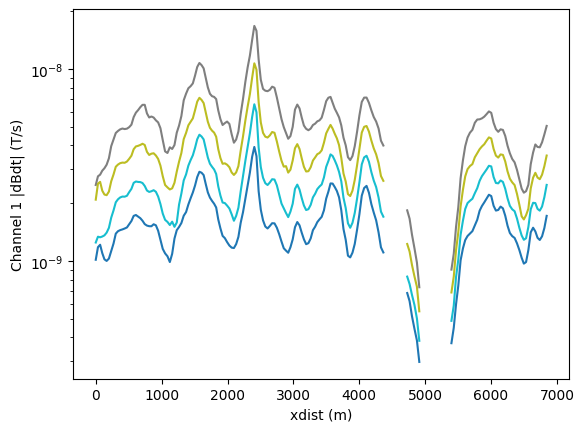

In [14]:
libaarhusxyz.XYZ(rootpath + "/inversion/processed.xyz", normalize=True).plot()

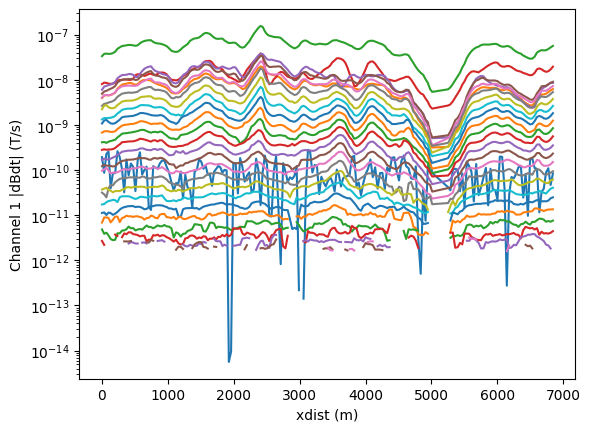

In [15]:
libaarhusxyz.XYZ(rootpath + "/processing/processed.xyz", normalize=True).plot()

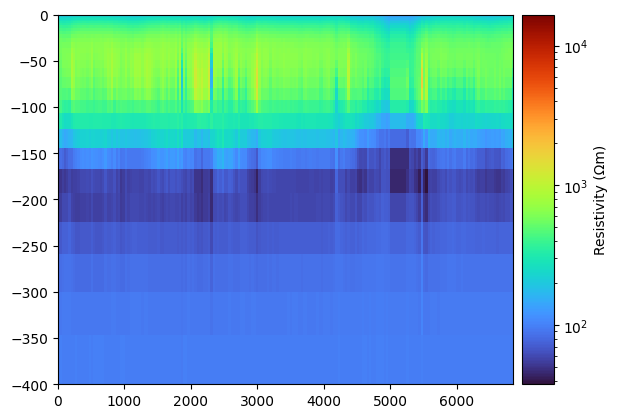

In [16]:
libaarhusxyz.XYZ(rootpath + "/inversion/smooth_model.xyz").plot()

In [17]:
libaarhusxyz.XYZ(rootpath + "/inversion/sparse_model.xyz").plot()

FileNotFoundError: [Errno 2] No such file or directory: '/home/redhog/Projects/Emerald/emerald-beryl-pipeline/docs/data/inversion/sparse_model.xyz'